In [ ]:
# Title of Assignment-2:
#     Implementing Feedforward neural networks with Keras and TensorFlow
#     a. Import the necessary packages
#     b. Load the training and testing data (MNIST)
#     c. Define the network architecture using Keras
#     d. Train the model using SGD
#     e. Evaluate the network
#     f. Plot the training loss and accuracy

In [2]:
import tensorflow as tf
from tensorflow import keras

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [7]:
# Loading and preparing the data
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [9]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(x_test))

60000
60000
10000
10000


In [10]:
#shape of training dataset
x_train.shape

(60000, 28, 28)

In [11]:
#shape of testing dataset
x_test.shape

(10000, 28, 28)

In [14]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

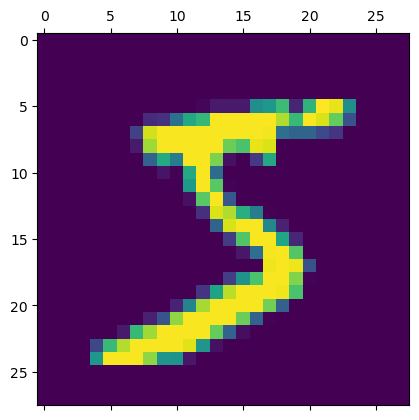

In [15]:
#to see how first image look
plt.matshow(x_train[0])

In [16]:
#normalize the images by scaling pixel intensities to the range 0,1
x_train = x_train/255.0
x_test = x_test/255.0

In [18]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#defining the network architecture using keras
# The ReLU function is one of the most popular activation functions. 
# It stands for “rectified linear unit”. Mathematically this function is defined as:
# y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if 
# the input is positive.
# 
# The softmax function is another activation function. 
# It changes input values into values that reach from 0 to 1.

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [23]:
# Train the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7258 - loss: 1.0341 - val_accuracy: 0.9028 - val_loss: 0.3548
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.9022 - loss: 0.3521 - val_accuracy: 0.9176 - val_loss: 0.2930
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.9166 - loss: 0.2957 - val_accuracy: 0.9273 - val_loss: 0.2605
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - accuracy: 0.9257 - loss: 0.2682 - val_accuracy: 0.9348 - val_loss: 0.2385
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.9306 - loss: 0.2470 - val_accuracy: 0.9386 - val_loss: 0.2204
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.9387 - loss: 0.2176 - val_accuracy: 0.9400 - val_loss: 0.2070
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.9405 - loss: 0.2065 - val_accuracy: 0.9442 - val_loss: 0.1949
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.9467 - l

In [25]:
# Evaluate the model
test_loss,test_acc = model.evaluate(x_test,y_test)
print("loss = ",test_loss)
print("accuracy = ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9439 - loss: 0.1932
loss =  0.16565027832984924
accuracy =  0.9527000188827515


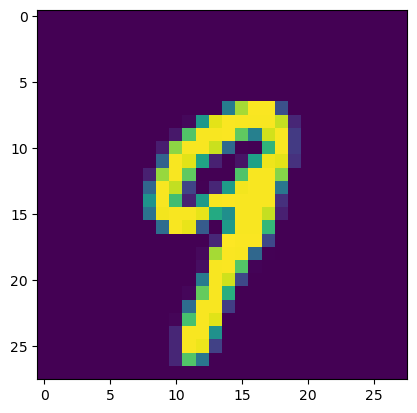

In [28]:
# Making Prediction on New Data
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [29]:
#we use predict() on new data
predict_val = model.predict(x_test)
print("written number in the img is  =%d" %np.argmax(predict_val[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step
written number in the img is  =9


In [34]:
# Plot graph for Accuracy and Loss
get_ipython().run_line_magic('pinfo2', 'history.history')


In [33]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

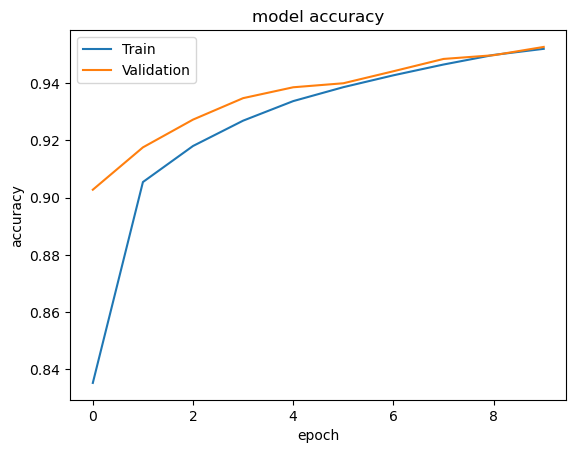

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

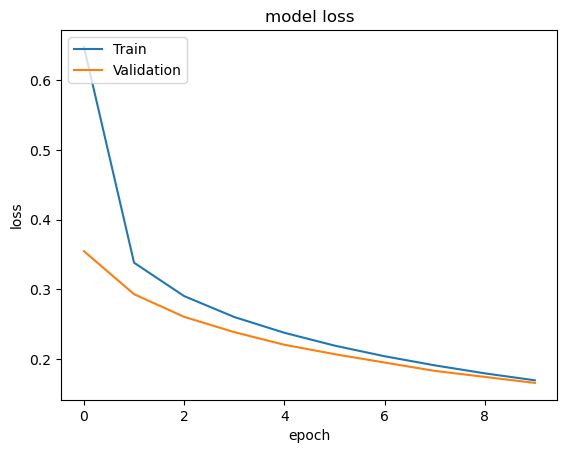

In [36]:

# graph representing the model’s accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

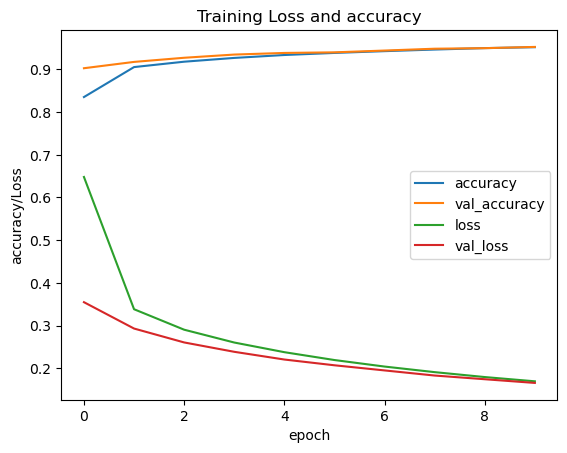

In [39]:
# graph represents the model’s loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

In [ ]:

# Conclusion: With above code We can see, that throughout the epochs, our model accuracy 
#     increases and our model loss decreases,that is good since our model gains confidence
#     with its predictions.
#     
#     1. The two losses (loss and val_loss) are decreasing and the accuracy 
#        (accuracy and val_accuracy)are increasing. 
#         So this indicates the model is trained in a good way.
# 
#     2. The val_accuracy is the measure of how good the predictions of your model are. 
#        So In this case, it looks like the model is well trained after 10 epochs